### 학습목표
- 버섯의 특징을 활용해 독 / 식용 버섯을 분류하는 실습을 해보자
- DecisionTree 분류모델을 학습하고 시각화 & 과대적합 제어
- 모델 자체적으로 중요도가 높은 특성이 무엇인지 확인해보자

### Desicion Tree(결정트리, 의사결정 나무)
- 스무고개 하듯이 True/False 질문을 반복하며 학습
- 특정 기준(질문, node)에 따라 데이터를 구분하는 모델
- 분류나 회귀 모두 사용 가능

In [3]:
# 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 머신러닝 패키지 호출 --> sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # 트리 분류 모델

### 1. 문제 정의
- 버섯 데이터를 활용해서 독성/식용 버섯을 분류

### 2. 데이터 수집
- csv파일

In [4]:
data = pd.read_csv('./data/mushroom.csv')
data

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [5]:
data.head(3)
# 답 데이터 -> poisonous
# p : 독버섯
# e : 식용버섯

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [6]:
# 데이터 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### 3~4. 데이터 전처리 및 탐색
- 문제(특성)와 답(라벨) 데이터 분리
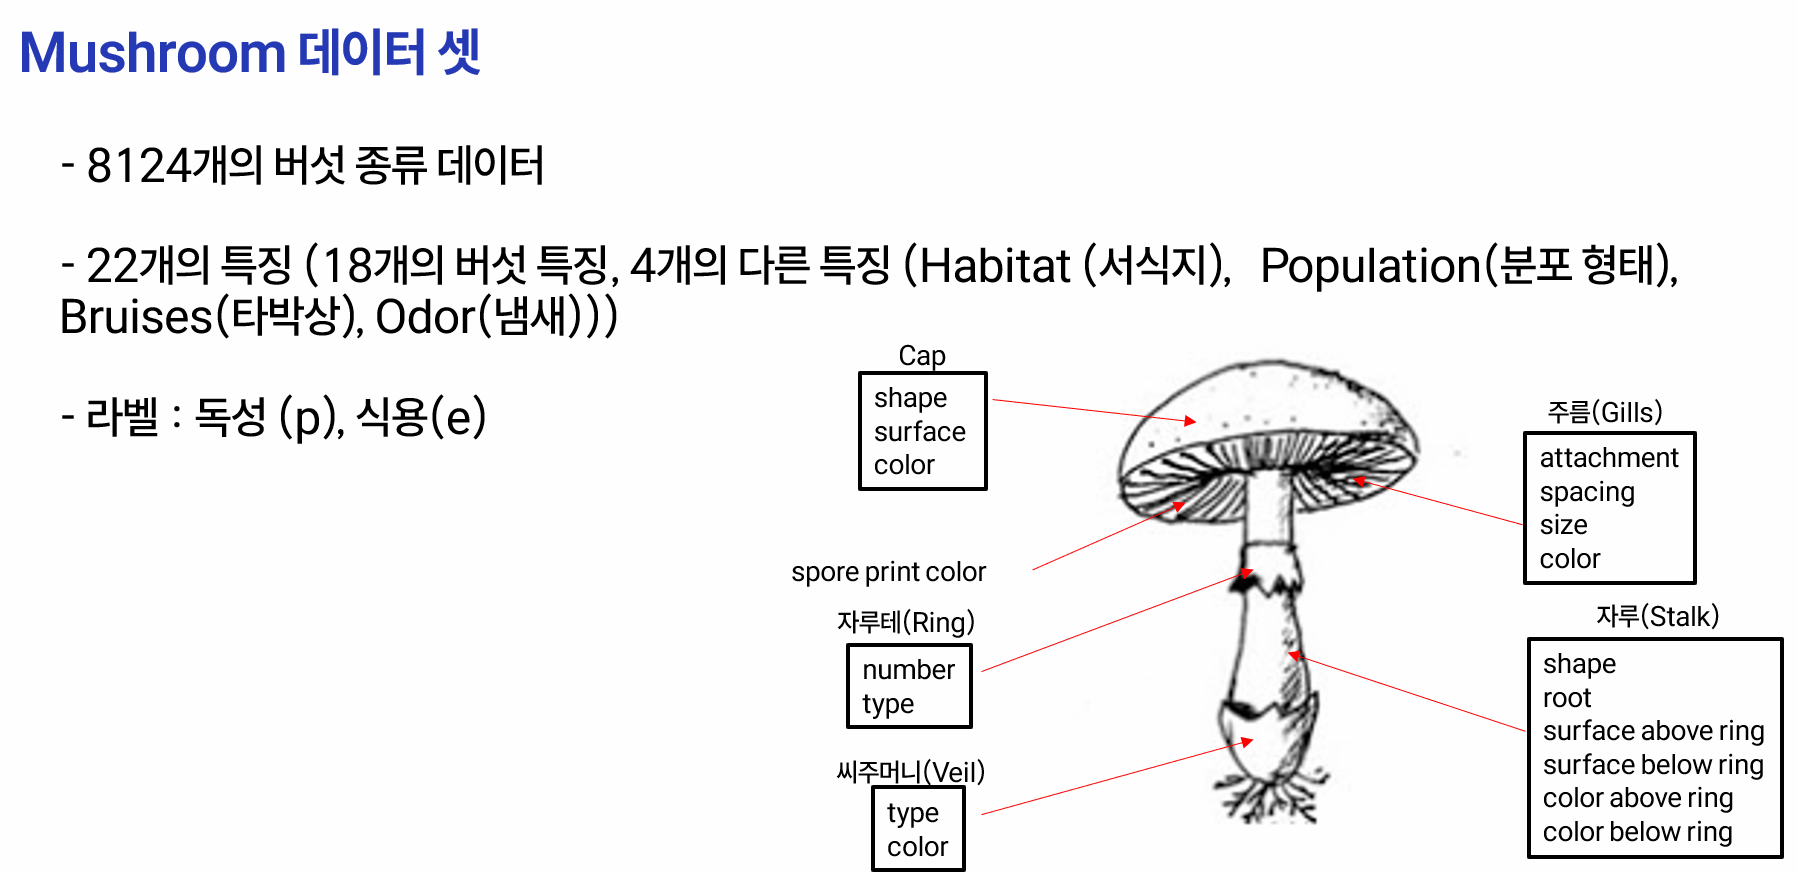
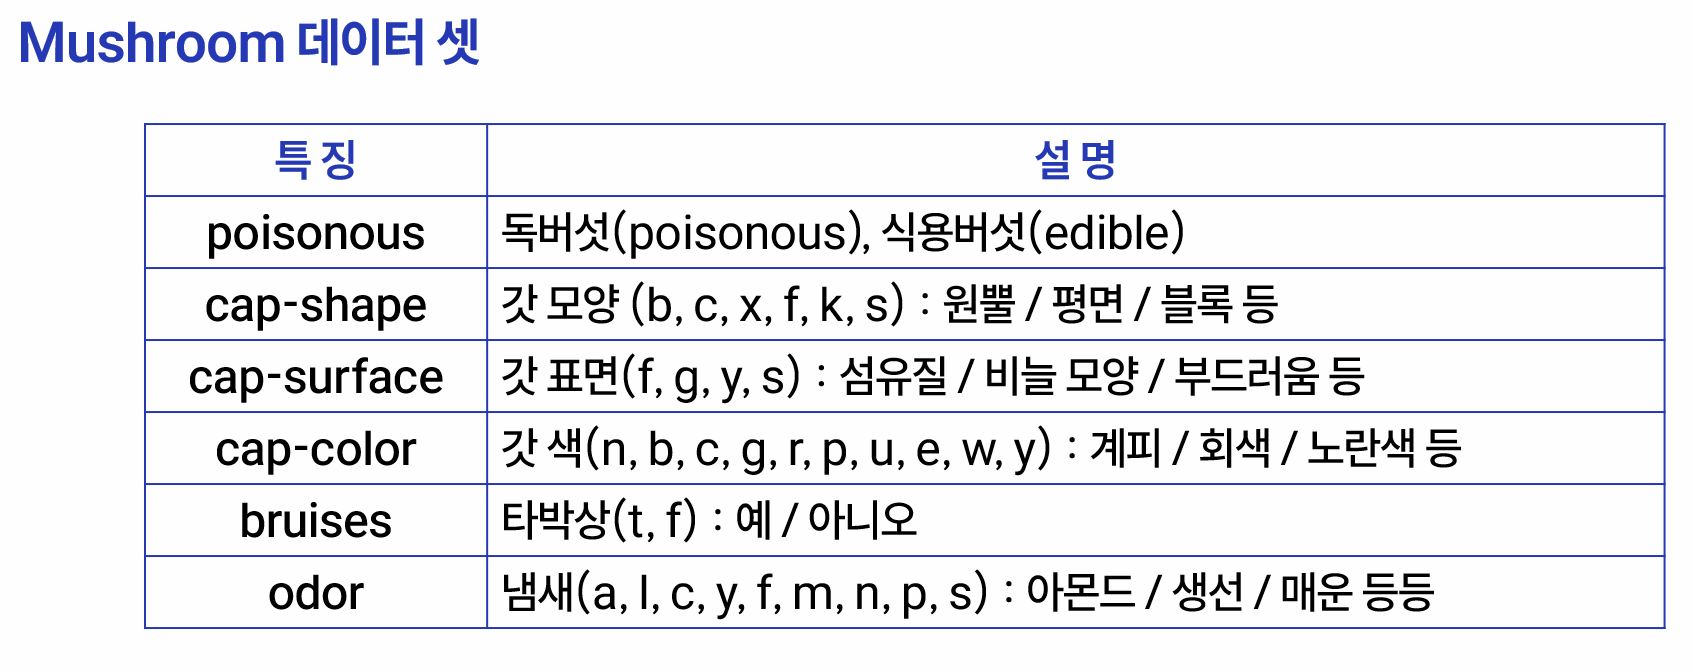
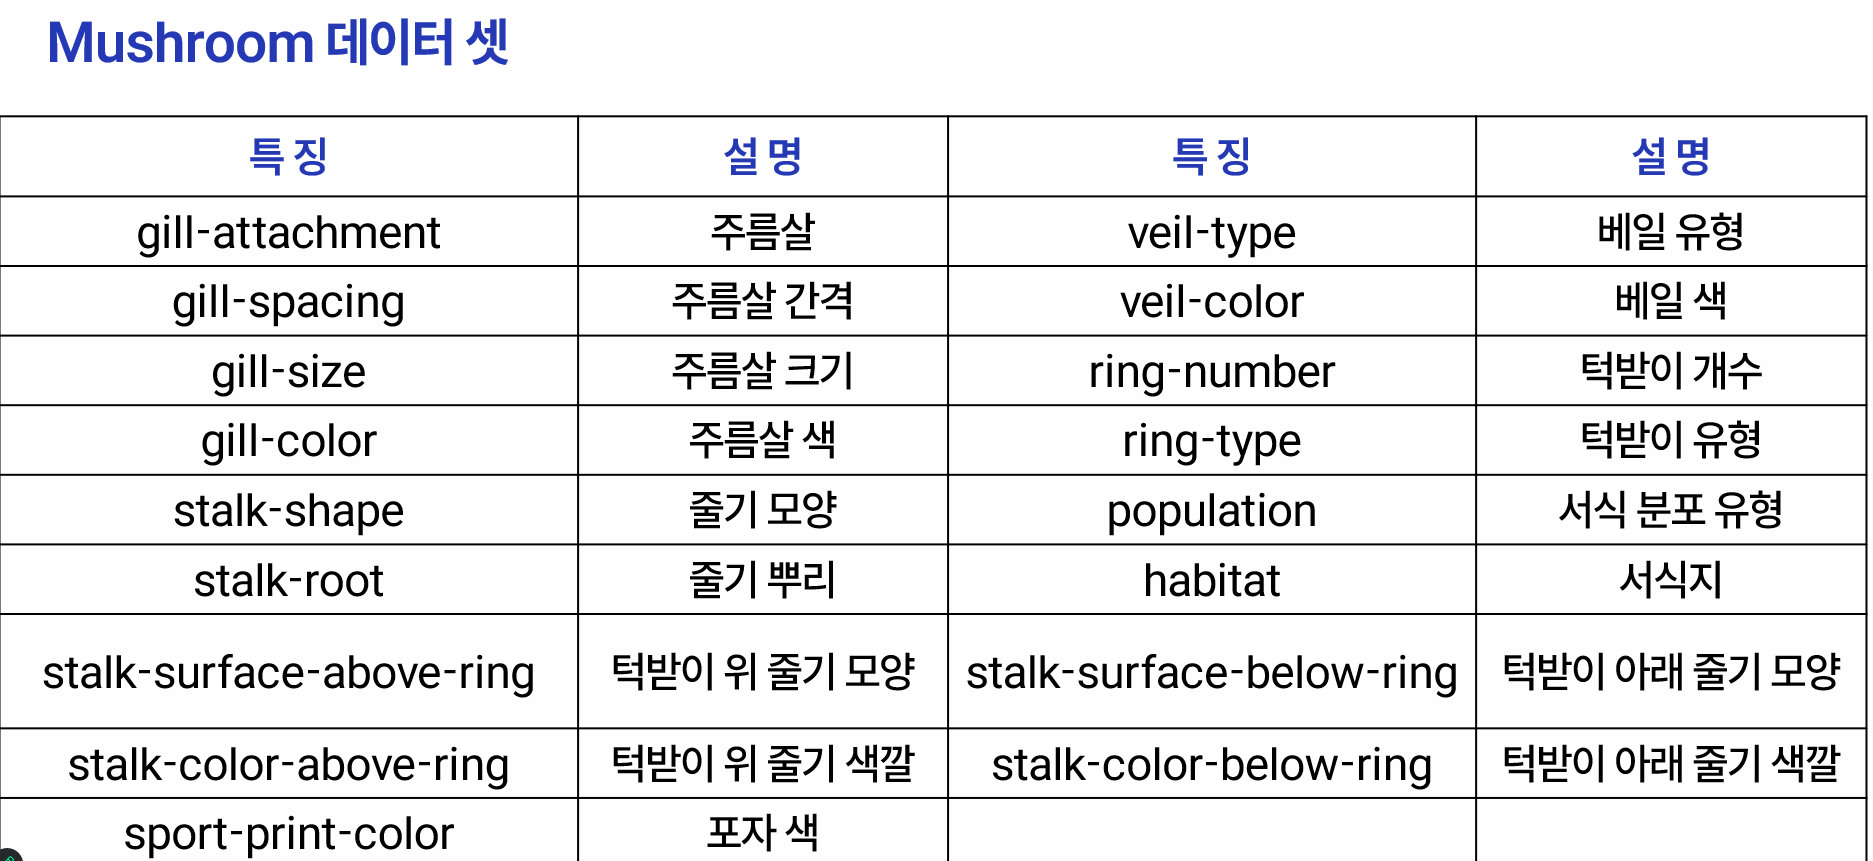

In [7]:
# 컬럼명 확인
data.columns

Index(['poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [8]:
# 문제(X), 답(y) 데이터 분리해서 변수에 담기

# 컬럼 인덱싱
# 답 데이터는 poisonous 컬럼, 문제 데이터는 답데이터를 제외한 모든 컬럼
X = data.iloc[ : , 1 : ] # 문제 데이터
y = data['poisonous'] # 답 데이터

# 크기 확인
# shape
print('문제 크기 : ', X.shape, '\n답 크기 : ', y.shape)

문제 크기 :  (8124, 22) 
답 크기 :  (8124,)


In [9]:
# 문제 데이터의 기술통계량 확인
# 최소값, 최대값, 중앙값, 최빈값, 평균값 ...
X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,...,s,w,w,p,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


#### 인코딩(encoding) : 범주(문자) -> 수치
- 레이블 인코딩(label encoding) : 일일이 매핑, 값의 크고 작음의 의미가 O
- 원핫 인코딩(one-hot encoding) : 데이터의 종류 개수만큼 열을 늘려줌. 값의 크고 작음의 의미가 X

In [10]:
# 버섯데이터는 문자형 컬럼 -> 모든 컬럼을 원핫인코딩 통해 수치형 변환
# get_dummies(대상) : 원핫 인코딩

# X 모든 컬럼 원핫 인코딩 적용
X_oh = pd.get_dummies(X) # True(1), False(0)
X_oh

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
8120,False,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False
8121,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,True,False,False,False,False


In [11]:
# 크기 확인
print(X.shape, '\n', X_oh.shape)

(8124, 22) 
 (8124, 117)


In [12]:
# 훈련세트와 테스트 세트로 분리 --> 문제(X_oh), 답(y)
# 훈련세트 : 테스트세트 = 7 : 3
# train_test_split()

X_train, X_test, y_train, y_test = train_test_split(X_oh, y, test_size = 0.3, random_state = 5)

In [13]:
# 크기 확인
print('훈련 문제 : ', X_train.shape, '\n훈련 답 : ', y_train.shape, '\n테스트 문제 : ', X_test.shape, '\n테스트 답 : ', y_test.shape)

훈련 문제 :  (5686, 117) 
훈련 답 :  (5686,) 
테스트 문제 :  (2438, 117) 
테스트 답 :  (2438,)


### 5. 모델링
- tree 모델 객체 생성
- 학습

In [14]:
# 모델 생성
tree_model = DecisionTreeClassifier() # 하이퍼파라미터 조정x 기본값 그대로 생성
tree_model

DecisionTreeClassifier()

#### 모델의 일반화 성능 확인 : 교차 검증(cross-validation)
- 개념 : 일반화 성능 측정 방법 -> 모든 데이터에 대해 모델이 얼마나 잘 맞추는지 내부적으로 평가, 한 번에 trian으로 test하는 것보다 더 안정적인 평가방법
- 방법 : 훈련세트를 기준으로 훈련세트, 검증용 세트로 여러겹 나눠서 평가(새로운 test데이터를 여러개 만들어서 평가)
- 모델을 정의하고 학습하기 전에 정확도가 어느 정도인지 확인 가능
- 장점 : 1) 과대적합/과소적합 방지 2) test하기 전 정확도를 알 수 있음

In [15]:
# 학습
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
# 교차검증 도구 호출
from sklearn.model_selection import cross_val_score

In [17]:
# cross_val_score(모델명, 훈련문제, 훈련답, cv = 검증횟수(검증 데이터를 몇 개로 나눌지))
result1 = cross_val_score(tree_model, X_train, y_train, cv = 5) * 100
result1

# 해당 모델은 버섯 분류에 있어서 과대적합을 제어하지 않아도 성능이 상당히 좋은 상태

array([100.        ,  99.91204925, 100.        , 100.        ,
       100.        ])

In [18]:
# 모델 평가
# X_test 성능 확인

# accuracy_score() : 정확도 평가도구
# 간혹 모델 자체적으로 정확도 평가 함수를 가지고 있는 경우 존재

# 모델이 자체적으로 가지고 있는 평가 함수 score() 사용 -> 정확도(accuracy)
tree_model.score(X_test, y_test) * 100 # 100% 정확도
# ==> 버섯 특징 데이터는 버섯을 잘 분류하기에 좋은 데이터였음


100.0

#### 모델이 선택한 중요한 특성 확인
- 특성 선택
- tree 계열의 모델은 특성 중요도를 출력하는 키워드가 있음
- 모델.feature_importances_

In [19]:
fi = tree_model.feature_importances_ # 특성 중요도
fi # 과학적 표기법(지수 표기법) --> 실수값

array([0.        , 0.00070414, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00140651, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02975405, 0.        , 0.        ,
       0.0229749 , 0.        , 0.60894119, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.0063993 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.18401748, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.09810763, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01209

In [20]:
# df로 변환
fi_df = pd.DataFrame(fi, index= X_oh.columns, columns=['import'])
fi_df

,import
cap-shape_b,0.000000
cap-shape_c,0.000704
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [21]:
# 특성 중요도 내림차순 정렬해보기(top 5)
fi_df['import'].sort_values(ascending=False).head()

# 중요도가 가장 높은 컬럼 odor_n --> 거의 60% 차지

odor_n                        0.608941
stalk-root_c                  0.184017
stalk-surface-below-ring_y    0.098108
spore-print-color_r           0.034899
odor_a                        0.029754
Name: import, dtype: float64

### tree모델 시각화

In [22]:
# %pip install graphviz

In [23]:
from sklearn.tree import export_graphviz # graphviz로 내보내주는 기능

In [24]:
# 결정 트리 모델 시각화하여 저장(내보내기)
export_graphviz(tree_model, out_file='./data/tree.dot', class_names=['독', '식'], feature_names=X_oh.columns, impurity=False, filled=True)
# impurity : 지니 불순도와 유사한 개념
# filled : 해당 노드의 클래스에 대한 색상 지정

In [25]:
# .dot 파일 불러와서 그래프를 그려주는 기능
import graphviz

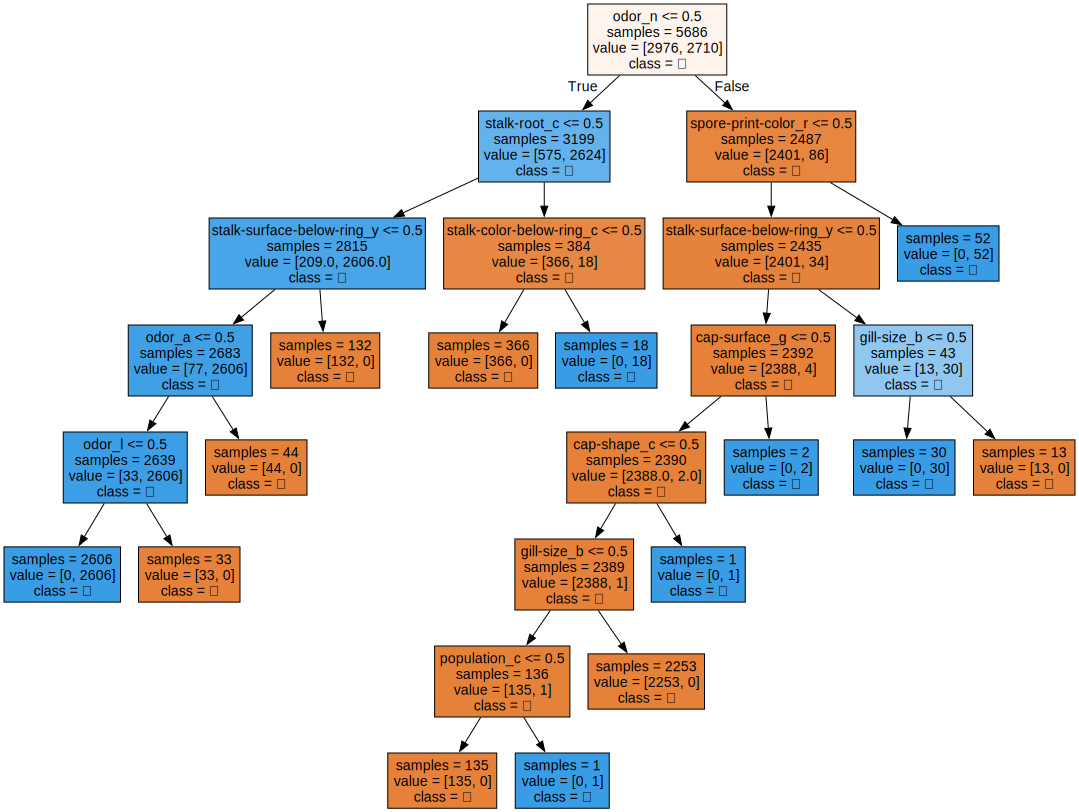

In [26]:
# tree.dot 파일 열어야함
with open("./data/tree.dot", encoding="UTF-8") as f:
    # 읽어진 상태
    dot_graph = f.read()
dot_graph

# 그래프 그리기
display(graphviz.Source(dot_graph))

In [29]:
# 하이퍼 파라미터 조정
# tree 모델 객체 생성 --> 최대 깊이(max_depth) 3
tree_model2 = DecisionTreeClassifier(max_depth=3)
tree_model2

# 학습
tree_model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

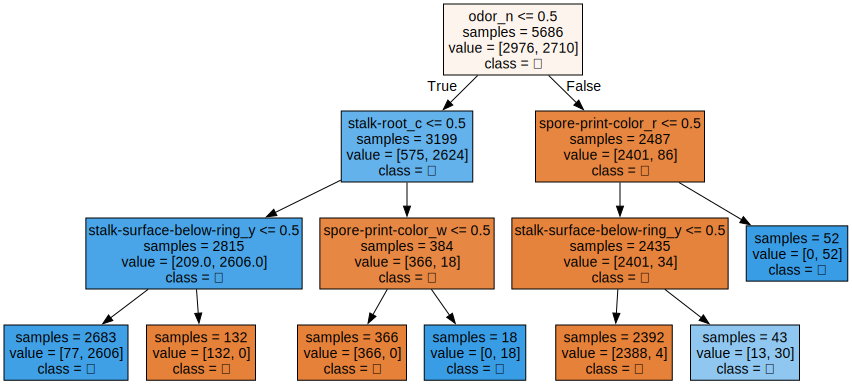

In [30]:
# 결정 트리 모델 시각화하여 저장(내보내기)
export_graphviz(tree_model2, out_file='./data/tree2.dot', class_names=['독', '식'], feature_names=X_oh.columns, impurity=False, filled=True)
# impurity : 지니 불순도와 유사한 개념
# filled : 해당 노드의 클래스에 대한 색상 지정


# tree.dot 파일 열어야함
with open("./data/tree2.dot", encoding="UTF-8") as f:
    # 읽어진 상태
    dot_graph2 = f.read()
dot_graph2

# 그래프 그리기
display(graphviz.Source(dot_graph2))